In [7]:
import tensorflow as tf
from tensorflow.keras.layers import LayerNormalization
import kapre
from tensorflow.keras.models import Sequential
from kapre.composed import get_melspectrogram_layer, get_log_frequency_spectrogram_layer
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.io import wavfile

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [8]:
def visualise_model(X):
    fig, ax = plt.subplots(figsize=(10,8))
    ax.set_title('Normalized Frequency Spectrogram', size=20)
    ax.imshow(X)
    ax.set_ylabel('Mel bins', size=18)
    ax.set_xlabel('Time (10 ms)', size=18)
    ax.xaxis.set_tick_params(labelsize=14)
    ax.yaxis.set_tick_params(labelsize=14)
    plt.show()

In [11]:
src, sr = librosa.load('clean/piano/Piano/David Guetta & Sia - Flames _ Piano cover _ Sheets _ Midi.mp3_11.wav', sr=None, mono=True)
print('Audio length: %d samples, %04.2f seconds. \n' % (len(src), len(src) / sr) +
      'Audio sample rate: %d Hz' % sr)
dt = 1.0
_src = src[:int(sr*dt)]
src = np.expand_dims(_src, axis=1)
input_shape = src.shape
print(input_shape)

Audio length: 16000 samples, 1.00 seconds. 
Audio sample rate: 16000 Hz
(16000, 1)


In [13]:
melgram = get_melspectrogram_layer(input_shape=input_shape,
                                   n_mels=128,
                                   mel_norm='slaney',
                                   pad_end=True,
                                   n_fft=512,
                                   win_length=400,
                                   hop_length=160,
                                   sample_rate=sr,
                                   db_ref_value=1.0,
                                   return_decibel=True,
                                   input_data_format='channels_last',
                                   output_data_format='channels_last')
norm = LayerNormalization(axis=2)
melgram.shape = (16000, 1)
model = Sequential()
model.add(melgram)
model.add(norm)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
melspectrogram (Sequential)  (None, 100, 128, 1)       0         
_________________________________________________________________
layer_normalization_1 (Layer (None, 100, 128, 1)       256       
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


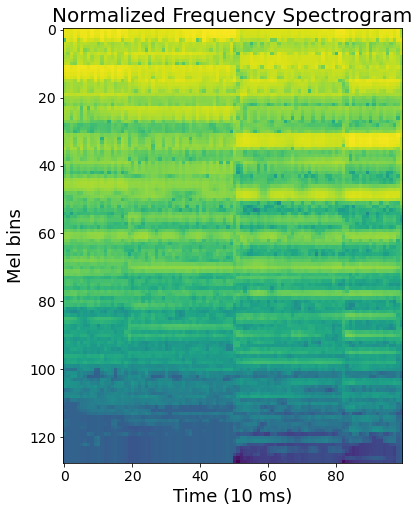

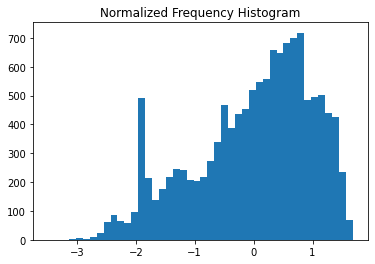

In [14]:
batch = np.expand_dims(src, axis=0)
X = model.predict(batch).squeeze().T
visualise_model(X)

plt.title('Normalized Frequency Histogram')
plt.hist(X.flatten(), bins='auto')
plt.show()